In [3]:
# Install Spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz
!pip install -q findspark

In [4]:
# Set up Spark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("YOLOv8_Fire_Detection").getOrCreate()


In [5]:
# Install Ultralytics YOLOv8
!pip install -q ultralytics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Define path to your dataset
dataset_path = "/content/drive/MyDrive/BDA-Project/Fire-Detection"
yaml_path = f"{dataset_path}/data.yaml"


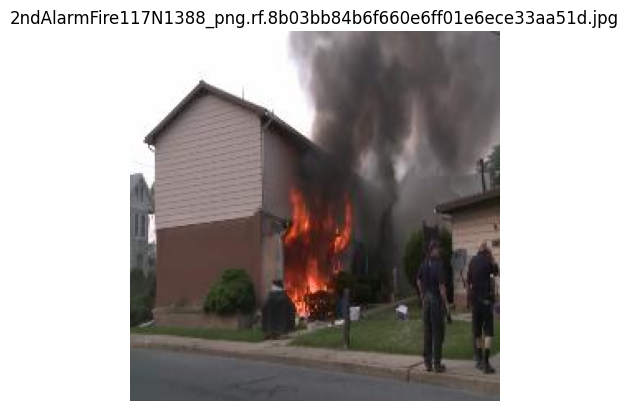

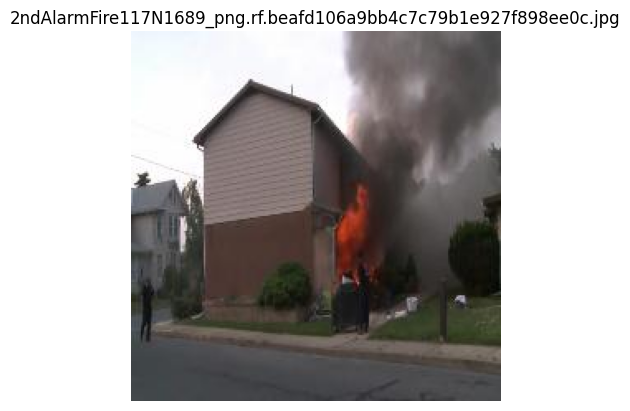

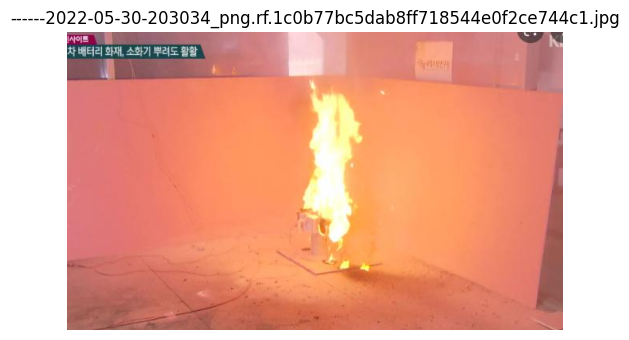

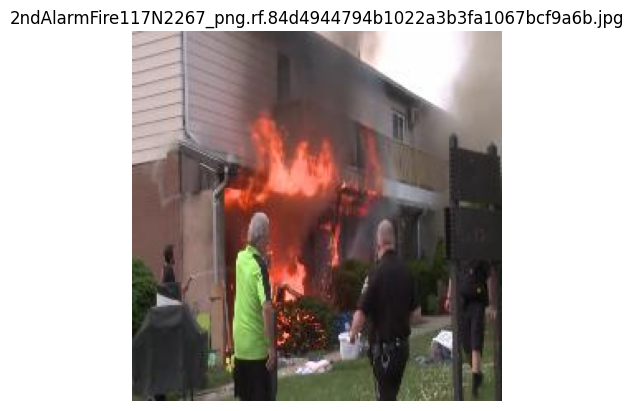

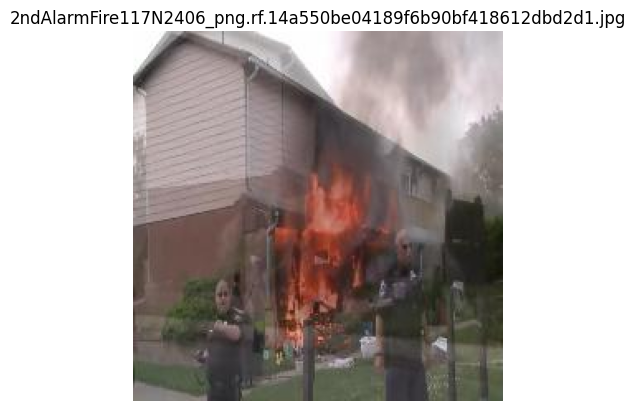

In [ ]:
import matplotlib.pyplot as plt
import glob
from PIL import Image

# Load and show sample images from training set
sample_imgs = glob.glob(f"{dataset_path}/train/images/*.jpg")[:5]

for path in sample_imgs:
    img = Image.open(path)
    plt.imshow(img)
    plt.title(os.path.basename(path))
    plt.axis("off")
    plt.show()


In [ ]:
from ultralytics import YOLO

# Load base YOLOv8 model
model = YOLO("yolov8n.pt")  # You can also use yolov8s.pt or yolov8m.pt for better accuracy

# Train with early stopping
model.train(
    data="/content/drive/MyDrive/BDA-Project/Fire-Detection/data.yaml",
    epochs=50,
    imgsz=640,
    batch=8,
    patience=5,  # 🔁 Early stopping if no improvement for 5 epochs
    project="fire_detection_yolo",
    name="fire_model_earlystop"
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 129MB/s]


Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/BDA-Project/Fire-Detection/data.yaml, epochs=50, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=fire_detection_yolo, name=fire_model_earlystop, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

100%|██████████| 755k/755k [00:00<00:00, 27.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 120MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/BDA-Project/Fire-Detection/train/labels.cache... 1004 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1004/1004 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/BDA-Project/Fire-Detection/valid/labels.cache... 590 images, 166 backgrounds, 0 corrupt: 100%|██████████| 754/754 [00:00<?, ?it/s]


Plotting labels to fire_detection_yolo/fire_model_earlystop/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to fire_detection_yolo/fire_model_earlystop
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.12G      1.511      2.417      1.491         15        640: 100%|██████████| 126/126 [00:31<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [02:17<00:00,  2.86s/it]


                   all        754        765      0.423      0.403      0.351      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.37G      1.549      2.107      1.523          9        640: 100%|██████████| 126/126 [00:25<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.32it/s]


                   all        754        765      0.237      0.395      0.212     0.0875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.38G      1.563      1.956      1.588         11        640: 100%|██████████| 126/126 [00:23<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.01it/s]


                   all        754        765      0.407      0.552      0.333      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.39G      1.597      1.823      1.587          8        640: 100%|██████████| 126/126 [00:25<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]


                   all        754        765      0.439      0.463      0.395       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.39G      1.551      1.725       1.53         11        640: 100%|██████████| 126/126 [00:25<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.24it/s]


                   all        754        765      0.579      0.557      0.568      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.39G      1.497      1.592      1.507          8        640: 100%|██████████| 126/126 [00:23<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.25it/s]


                   all        754        765      0.493      0.642      0.535      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.39G      1.448      1.525      1.477          9        640: 100%|██████████| 126/126 [00:25<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]


                   all        754        765      0.614      0.616      0.593      0.336

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.39G      1.417      1.459      1.458         12        640: 100%|██████████| 126/126 [00:25<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.15it/s]


                   all        754        765      0.569      0.634      0.619      0.375

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.39G      1.388      1.404      1.413         13        640: 100%|██████████| 126/126 [00:22<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.26it/s]

                   all        754        765      0.519      0.678      0.535      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.39G      1.347      1.355      1.418         13        640: 100%|██████████| 126/126 [00:24<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.85it/s]

                   all        754        765      0.534      0.658      0.522      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.39G      1.365      1.305      1.409         10        640: 100%|██████████| 126/126 [00:25<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:07<00:00,  6.21it/s]


                   all        754        765      0.589       0.61      0.513      0.325

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.39G      1.367      1.343       1.41         16        640: 100%|██████████| 126/126 [00:24<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.17it/s]

                   all        754        765      0.581      0.637      0.586      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.39G      1.354      1.322      1.399          8        640: 100%|██████████| 126/126 [00:23<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.37it/s]

                   all        754        765      0.618      0.697       0.61      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.39G      1.325       1.28      1.373          9        640: 100%|██████████| 126/126 [00:25<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:07<00:00,  6.33it/s]

                   all        754        765      0.595      0.673      0.563      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.39G      1.262      1.236      1.358         15        640: 100%|██████████| 126/126 [00:24<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.20it/s]

                   all        754        765      0.634      0.667       0.66      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.39G      1.278      1.229      1.352         10        640: 100%|██████████| 126/126 [00:24<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:08<00:00,  5.34it/s]

                   all        754        765       0.59      0.674       0.57      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.39G      1.259      1.179      1.341         16        640: 100%|██████████| 126/126 [00:25<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]

                   all        754        765      0.599      0.715      0.662      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.39G      1.243      1.158      1.333         11        640: 100%|██████████| 126/126 [00:25<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.14it/s]

                   all        754        765      0.588      0.679      0.596      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.39G      1.226      1.163      1.318          7        640: 100%|██████████| 126/126 [00:23<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:09<00:00,  5.30it/s]

                   all        754        765      0.601      0.757      0.608      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.39G      1.201      1.133      1.315          6        640: 100%|██████████| 126/126 [00:25<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]

                   all        754        765      0.615      0.737      0.632      0.419
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 15, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



20 epochs completed in 0.228 hours.
Optimizer stripped from fire_detection_yolo/fire_model_earlystop/weights/last.pt, 6.2MB
Optimizer stripped from fire_detection_yolo/fire_model_earlystop/weights/best.pt, 6.2MB

Validating fire_detection_yolo/fire_model_earlystop/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:10<00:00,  4.40it/s]


                   all        754        765      0.634      0.667      0.661       0.42
Speed: 0.5ms preprocess, 3.0ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to fire_detection_yolo/fire_model_earlystop


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e068dd245d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Save best.pt to Google Drive
!cp /content/fire_detection_yolo/fire_model/weights/best.pt /content/drive/MyDrive/BDA-Project/fire_model_best.pt
print("✅ Trained model saved to: /content/drive/MyDrive/BDA-Project/fire_model_best.pt")


cp: cannot stat '/content/fire_detection_yolo/fire_model/weights/best.pt': No such file or directory
✅ Trained model saved to: /content/drive/MyDrive/BDA-Project/fire_model_best.pt


In [ ]:
import shutil

src_path = "/content/fire_detection_yolo/fire_model_earlystop/weights/best.pt"
dst_path = "/content/drive/MyDrive/BDA-Project/fire_model_best.pt"

shutil.copy(src_path, dst_path)
print(f"✅ Model saved to Drive at: {dst_path}")


✅ Model saved to Drive at: /content/drive/MyDrive/BDA-Project/fire_model_best.pt


In [7]:
from ultralytics import YOLO

# Load trained model from Drive
model = YOLO("/content/drive/MyDrive/BDA-Project/fire_model_best.pt")
print("✅ Model loaded from Drive!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Model loaded from Drive!


In [ ]:
# Run detection
model.predict(
    source=f"{dataset_path}/test/images",  # test image folder
    save=True,
    conf=0.25
)


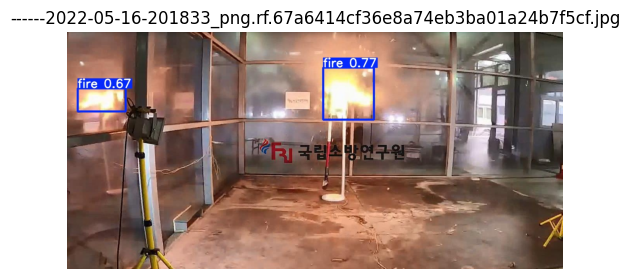

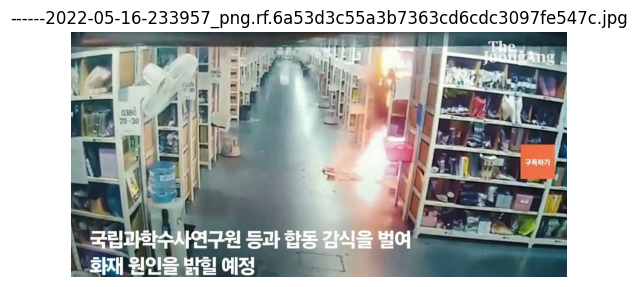

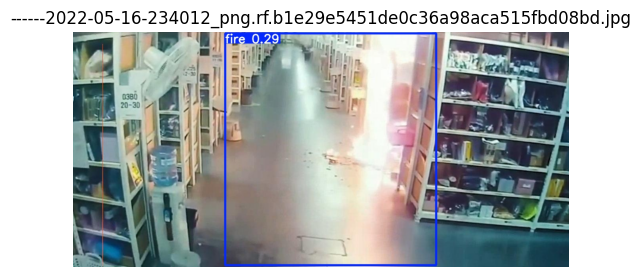

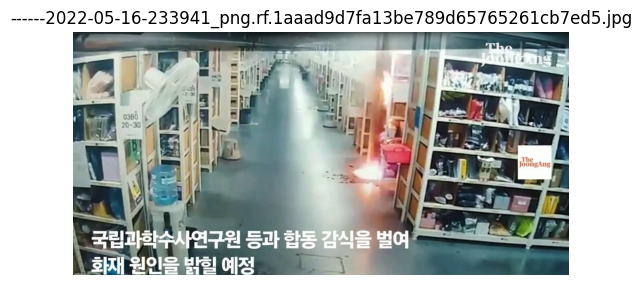

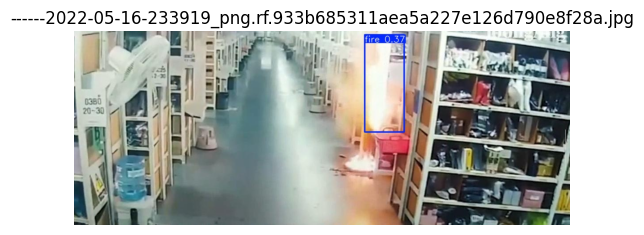

In [10]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

predicted_imgs = glob.glob("/content/runs/detect/predict/*.jpg")[:5]

for img_path in predicted_imgs:
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
    plt.show()


In [11]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained fire detection model once
fire_model = YOLO("/content/drive/MyDrive/BDA-Project/fire_model_best.pt")


In [12]:

def predict_fire(image_path):

    # Run prediction
    results = fire_model(image_path, conf=0.4)  # You can adjust confidence threshold

    # Show result image
    results[0].show()

    # Save and display
    results[0].save(filename="/content/fire_detection_result.jpg")
    img = Image.open("/content/fire_detection_result.jpg")

    # Show image
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title("🔥 Fire Detection Result")
    plt.show()

    # Print detected object count
    boxes = results[0].boxes
    print(f"🧯 Detected {len(boxes)} fire instance(s) in the image.")



image 1/1 /content/drive/MyDrive/BDA-Project/Fire-Detection/test/images/2ndAlarmFire117N3749_png.rf.8a0086539755978ad9b8b96679a617d9.jpg: 640x640 2 fires, 7.7ms
Speed: 2.6ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


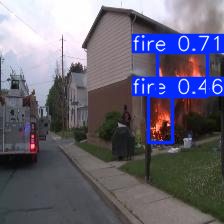

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


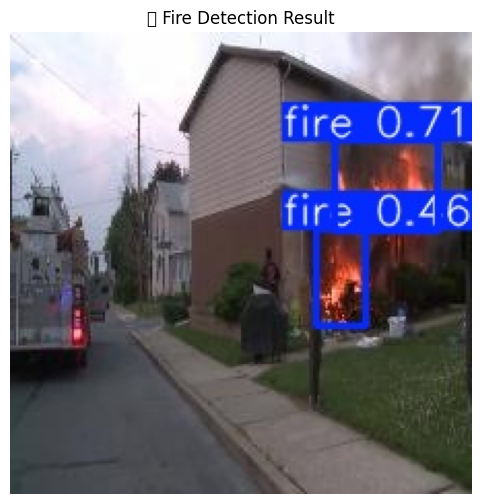

🧯 Detected 2 fire instance(s) in the image.


In [13]:
predict_fire("/content/drive/MyDrive/BDA-Project/Fire-Detection/test/images/2ndAlarmFire117N3749_png.rf.8a0086539755978ad9b8b96679a617d9.jpg")

In [ ]:
predict_fire()

## SPARK

In [15]:
# Install PySpark (if not already in Colab)
!pip install -q pyspark


In [16]:
from pyspark.sql import SparkSession

# Start Spark Session
spark = SparkSession.builder \
    .appName("FireDetectionWithSpark") \
    .getOrCreate()

print("✅ Spark Session started!")


✅ Spark Session started!


In [14]:
import os

# Path to test images
test_image_dir = "/content/drive/MyDrive/BDA-Project/Fire-Detection/test/images"

# List all image file paths
image_paths = [os.path.join(test_image_dir, img) for img in os.listdir(test_image_dir) if img.endswith((".jpg", ".png"))]

# Create a Spark DataFrame
image_df = spark.createDataFrame([(path,) for path in image_paths], ["image_path"])
image_df.show(5)


+--------------------+
|          image_path|
+--------------------+
|/content/drive/My...|
|/content/drive/My...|
|/content/drive/My...|
|/content/drive/My...|
|/content/drive/My...|
+--------------------+
only showing top 5 rows



In [ ]:
from ultralytics import YOLO
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Load trained fire detection model
model = YOLO("/content/drive/MyDrive/BDA-Project/fire_model_best.pt")

# Define UDF to detect fire
def detect_fire(image_path):
    results = model(image_path, conf=0.4)
    detections = results[0].boxes
    count = len(detections)
    return f"🔥 Detected {count} fire object(s)"

# Register UDF
detect_fire_udf = udf(detect_fire, StringType())


In [ ]:
# Apply the UDF to run YOLOv8 detection on each image path
results_df = image_df.withColumn("detection_result", detect_fire_udf(image_df.image_path))
results_df.show(truncate=False)


+--------------------------------------------------------------------------------------------------------------------------------------------+----------------------------+
|image_path                                                                                                                                  |detection_result            |
+--------------------------------------------------------------------------------------------------------------------------------------------+----------------------------+
|/content/drive/MyDrive/BDA-Project/Fire-Detection/test/images/------2022-05-30-202825_png.rf.6b5e3a8db503af053ba8fa6f30b7040f.jpg           |🔥 Detected 7 fire object(s)|
|/content/drive/MyDrive/BDA-Project/Fire-Detection/test/images/------2022-05-30-202745_png.rf.227328fbf7384868a69551a1700a8244.jpg           |🔥 Detected 1 fire object(s)|
|/content/drive/MyDrive/BDA-Project/Fire-Detection/test/images/10-9-15-2-400_jpg.rf.fcdaa68e9709eba04415be0abb8002e8.jpg                     |

# Compare with Spark && Without spark

## With SPARK

In [ ]:
# Spark session
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from ultralytics import YOLO
import os

# Start Spark
spark = SparkSession.builder.appName("FireDetectionWithSpark").getOrCreate()

# Load image paths
image_paths = [os.path.join(test_image_dir, img) for img in os.listdir(test_image_dir) if img.endswith((".jpg", ".png"))]
image_df = spark.createDataFrame([(path,) for path in image_paths], ["image_path"])

# Load YOLOv8 model once
model = YOLO("/content/drive/MyDrive/BDA-Project/fire_model_best.pt")

# Define Spark UDF
def detect_fire_spark(image_path):
    result = model(image_path, conf=0.4)
    return f"{len(result[0].boxes)} fire object(s)"

detect_fire_udf = udf(detect_fire_spark, StringType())

# Apply UDF
results_df = image_df.withColumn("fire_detected", detect_fire_udf(image_df.image_path))
results_df.show(truncate=False)


+--------------------------------------------------------------------------------------------------------------------------------------------+----------------+
|image_path                                                                                                                                  |fire_detected   |
+--------------------------------------------------------------------------------------------------------------------------------------------+----------------+
|/content/drive/MyDrive/BDA-Project/Fire-Detection/test/images/------2022-05-30-202825_png.rf.6b5e3a8db503af053ba8fa6f30b7040f.jpg           |7 fire object(s)|
|/content/drive/MyDrive/BDA-Project/Fire-Detection/test/images/------2022-05-30-202745_png.rf.227328fbf7384868a69551a1700a8244.jpg           |1 fire object(s)|
|/content/drive/MyDrive/BDA-Project/Fire-Detection/test/images/10-9-15-2-400_jpg.rf.fcdaa68e9709eba04415be0abb8002e8.jpg                     |3 fire object(s)|
|/content/drive/MyDrive/BDA-Project/Fire

## Without Spark


image 1/1 /content/drive/MyDrive/BDA-Project/Fire-Detection/test/images/------2022-05-30-202825_png.rf.6b5e3a8db503af053ba8fa6f30b7040f.jpg: 224x640 7 fires, 8.0ms
Speed: 1.6ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
------2022-05-30-202825_png.rf.6b5e3a8db503af053ba8fa6f30b7040f.jpg: 🔥 Detected 7 fire object(s)

image 1/1 /content/drive/MyDrive/BDA-Project/Fire-Detection/test/images/------2022-05-30-202745_png.rf.227328fbf7384868a69551a1700a8244.jpg: 608x640 1 fire, 9.8ms
Speed: 2.7ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)
------2022-05-30-202745_png.rf.227328fbf7384868a69551a1700a8244.jpg: 🔥 Detected 1 fire object(s)

image 1/1 /content/drive/MyDrive/BDA-Project/Fire-Detection/test/images/10-9-15-2-400_jpg.rf.fcdaa68e9709eba04415be0abb8002e8.jpg: 544x640 3 fires, 39.5ms
Speed: 3.3ms preprocess, 39.5ms inference, 2.4ms postprocess per image at shape (1, 3, 544, 640)
10-9-15-2-400_jpg.rf.fcdaa68e970